In [1]:
import pandas as pd
df = pd.read_csv("finale.csv", index_col=0)

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df.columns

Index(['Software_Developer', 'Database_Administrator', 'Systems_Administrator',
       'Project_manager', 'Web_Developer', 'Network_Administrator',
       'Security_Analyst', 'Python_Developer', 'Java_Developer',
       'Front_End_Developer', 'Ents', 'new'],
      dtype='object')

In [4]:
classes = ['Software_Developer', 'Database_Administrator',
           'Systems_Administrator', 'Project_manager',
           'Web_Developer', 'Network_Administrator',
           'Security_Analyst', 'Python_Developer',
           'Java_Developer', 'Front_End_Developer']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29783 entries, 0 to 29782
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Software_Developer      29783 non-null  int64 
 1   Database_Administrator  29783 non-null  int64 
 2   Systems_Administrator   29783 non-null  int64 
 3   Project_manager         29783 non-null  int64 
 4   Web_Developer           29783 non-null  int64 
 5   Network_Administrator   29783 non-null  int64 
 6   Security_Analyst        29783 non-null  int64 
 7   Python_Developer        29783 non-null  int64 
 8   Java_Developer          29783 non-null  int64 
 9   Front_End_Developer     29783 non-null  int64 
 10  Ents                    29783 non-null  object
 11  new                     29721 non-null  object
dtypes: int64(10), object(2)
memory usage: 3.0+ MB


In [6]:
df.shape

(29783, 12)

In [7]:
df['new']

0        sql ssis oltp backing generating log shipping ...
1        microsoft xp microsoft assembly language micro...
2        carrier objective experienced creating users r...
3        amazon redshift administrator redshift adminis...
4        scrum masterscrum master scrum master scrum ma...
                               ...                        
29778    servicenow developerservicenow developerservic...
29779    developerandroid developerjoomla cms samsung w...
29780    ui web developervisual web applications develo...
29781                                                  php
29782    sr software web developerweb developerweb deve...
Name: new, Length: 29783, dtype: object

In [8]:
for i in range(0,29783):
  if type(df['new'][i]) =="float":
    print("found")

In [9]:
tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(str(i) for i in df['new'])

In [10]:
tokenizer

In [11]:
sequences = tokenizer.texts_to_sequences(str(i) for i in df['new'])
x = pad_sequences(sequences, maxlen=256)

In [12]:
df

,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer,Ents,new
0,0,1,0,0,0,0,0,0,0,0,"[SQL, SSIS, OLTP, Backing, Generating, Log Shi...",sql ssis oltp backing generating log shipping ...
1,0,1,0,0,0,0,0,0,0,0,"[Microsoft, XP Microsoft, Assembly Language Mi...",microsoft xp microsoft assembly language micro...
2,0,1,0,0,0,0,0,0,0,0,"[Carrier Objective, Experienced Creating Users...",carrier objective experienced creating users r...
3,0,1,0,0,0,0,0,0,0,0,"[Amazon Redshift Administrator, yearsPostgresS...",amazon redshift administrator redshift adminis...
4,0,1,0,0,0,0,0,0,0,0,"[Scrum Master, Scrum Master, October April R...",scrum masterscrum master scrum master scrum ma...
...,...,...,...,...,...,...,...,...,...,...,...,...
29778,1,0,0,0,1,0,0,0,1,0,[ServiceNow DeveloperServiceNow DeveloperServi...,servicenow developerservicenow developerservic...
29779,1,0,0,0,1,0,0,0,0,0,"[DeveloperAndroid, DeveloperJoomla CMS, Samsun...",developerandroid developerjoomla cms samsung w...
29780,1,0,0,0,1,0,0,0,0,1,"[UI, WEB, DeveloperVisual, Web Applications De...",ui web developervisual web applications develo...
29781,1,0,0,0,1,0,0,0,0,0,"[September July , PHP]",php


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, df[df.columns[:10]], test_size=0.2, random_state=42, shuffle=True)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout,Conv1D
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L2
import tensorflow as tf

In [15]:
model = Sequential()
model.add(Embedding(1000,16, input_length=256))
model.add(GlobalMaxPool1D())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='sigmoid'))

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Precision','Recall','AUC','Accuracy'])

In [17]:
from keras.utils.vis_utils import plot_model

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
import numpy as np

In [20]:
y =y_train.values.astype(np.float32)

In [21]:
history=model.fit(X_train,y,epochs=100)

Epoch 1/100
745/745 [==============================] - 98s 8ms/step - loss: 0.4081 - precision: 0.6057 - recall: 0.2056 - auc: 0.7241 - Accuracy: 0.5393
Epoch 2/100
745/745 [==============================] - 5s 6ms/step - loss: 0.3022 - precision: 0.7638 - recall: 0.3619 - auc: 0.8734 - Accuracy: 0.6394
Epoch 3/100
745/745 [==============================] - 5s 7ms/step - loss: 0.2883 - precision: 0.7534 - recall: 0.4053 - auc: 0.8889 - Accuracy: 0.6546
Epoch 4/100
745/745 [==============================] - 5s 7ms/step - loss: 0.2799 - precision: 0.7496 - recall: 0.4417 - auc: 0.8981 - Accuracy: 0.6659
Epoch 5/100
745/745 [==============================] - 5s 7ms/step - loss: 0.2740 - precision: 0.7669 - recall: 0.4650 - auc: 0.9035 - Accuracy: 0.6735
Epoch 6/100
745/745 [==============================] - 5s 7ms/step - loss: 0.2683 - precision: 0.7756 - recall: 0.4811 - auc: 0.9085 - Accuracy: 0.6827
Epoch 7/100
745/745 [==============================] - 5s 7ms/step - loss: 0.2630 - pre

745/745 [==============================] - 5s 7ms/step - loss: 0.1850 - precision: 0.8366 - recall: 0.7378 - auc: 0.9577 - Accuracy: 0.7995
Epoch 55/100
745/745 [==============================] - 5s 7ms/step - loss: 0.1841 - precision: 0.8375 - recall: 0.7389 - auc: 0.9582 - Accuracy: 0.8032
Epoch 56/100
745/745 [==============================] - 5s 7ms/step - loss: 0.1848 - precision: 0.8383 - recall: 0.7419 - auc: 0.9576 - Accuracy: 0.8039
Epoch 57/100
745/745 [==============================] - 5s 7ms/step - loss: 0.1842 - precision: 0.8406 - recall: 0.7399 - auc: 0.9578 - Accuracy: 0.8027
Epoch 58/100
745/745 [==============================] - 5s 7ms/step - loss: 0.1833 - precision: 0.8407 - recall: 0.7420 - auc: 0.9583 - Accuracy: 0.8060
Epoch 59/100
745/745 [==============================] - 5s 6ms/step - loss: 0.1827 - precision: 0.8405 - recall: 0.7395 - auc: 0.9587 - Accuracy: 0.8051
Epoch 60/100
745/745 [==============================] - 5s 6ms/step - loss: 0.1832 - precision:

In [22]:
model.evaluate(X_test,y_test)

187/187 [==============================] - 45s 6ms/step - loss: 0.2009 - precision: 0.8168 - recall: 0.7240 - auc: 0.9505 - Accuracy: 0.7808


[0.20092898607254028,
 0.8167701959609985,
 0.7239677309989929,
 0.9505454301834106,
 0.7807621359825134]

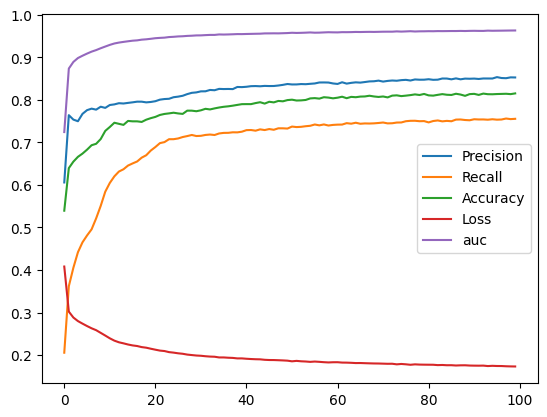

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['precision'],label='Precision')
plt.plot(history.history['recall'],label='Recall')
plt.plot(history.history['Accuracy'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['auc'],label='auc')
plt.legend()

In [24]:
y_pred=model.predict(X_test)
y_pred

187/187 [==============================] - 1s 2ms/step


array([[9.9981529e-01, 3.5946615e-04, 3.3841850e-03, ..., 2.0426344e-03,
        9.6202105e-01, 1.0156371e-01],
       [3.4397191e-01, 6.3499993e-01, 1.7970155e-01, ..., 1.3112124e-02,
        2.0722101e-02, 2.9896123e-03],
       [9.7651742e-02, 6.7227773e-02, 2.5123611e-01, ..., 1.1156124e-04,
        7.6237816e-04, 6.5723289e-04],
       ...,
       [5.3072162e-03, 1.6288031e-03, 3.7348428e-01, ..., 2.8706120e-06,
        1.9478235e-05, 7.5916993e-05],
       [8.0959741e-03, 1.4009591e-03, 3.4473542e-02, ..., 6.7763081e-05,
        5.8863502e-06, 8.8061206e-06],
       [9.8478377e-01, 8.4318817e-03, 9.5940847e-03, ..., 5.7932991e-03,
        1.2383109e-02, 4.5323387e-02]], dtype=float32)

In [25]:
normalized = []
for i in y_pred:
    l = []
    for j in i:
        if j>=0.50:
            l.append(1)
        else:
            l.append(0)
    normalized.append(l)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(metrics.classification_report(y_test, normalized,target_names= classes))

                        precision    recall  f1-score   support

    Software_Developer       0.96      0.91      0.93      2973
Database_Administrator       0.84      0.69      0.76       621
 Systems_Administrator       0.70      0.65      0.67      1215
       Project_manager       0.75      0.54      0.63       911
         Web_Developer       0.67      0.59      0.62      1260
 Network_Administrator       0.75      0.61      0.67       937
      Security_Analyst       0.70      0.61      0.65       605
      Python_Developer       0.87      0.76      0.81       539
        Java_Developer       0.85      0.72      0.78       680
   Front_End_Developer       0.83      0.79      0.81       794

             micro avg       0.82      0.72      0.77     10535
             macro avg       0.79      0.69      0.73     10535
          weighted avg       0.81      0.72      0.76     10535
           samples avg       0.78      0.73      0.73     10535



D:\Users\Pushkar\anaconda3\envs\major\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Pushkar\anaconda3\envs\major\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
model.save('Resume_Classifier_DNN.h5')